## In-class exercise for tutorial 010

In this exercise we will practice making datasets. We will on the one hand simulating data, on the other hand not quite as we will be making some asumptions and simplifaction on the data generation process that will not make the data.

Nestor lives right under the ATX airport, along the routes of airliners from major companies (United, Delt, etc).

Because of that Nestor hears noise. The noise is generated by the airplanes landing and taking off. There is a lot of noise that is generated by these airplanes. One day Nestor decides to simulate the noise generated by the airplanes and reaching his years. [Nestor is worried about his hearing loss](https://www.cdc.gov/niosh/topics/aircrew/noise.html). 

### The problem to simulate

Nestor is interested in calculating how much noise he is being exposed to. So he goes and looks up the timetable during the 3 hours window in the morning, when he is at home, and during the 7 hours window in the evening, when he is at hom, and before midnight when the airport shuts down and no more flights land or takeoff.

Nestor lives about 2 miles away from the airport. At that distance each jet generates about 75-80 dB (Decibels).
We will say 75dB. In the morning there are about 45 airplanes that land/takeoff. Each airplane can be heard consistently for about 7 minutes (we will assume a flat top distribution of the dBs, no ramp up, no decay, a simple flat distribution).

In the 3 hours window of the morning, Airplanes depart and land every 3 minutes, so their noise overlap for about 4 minutes. The dB of an airplane is corrupted by noise due to the city and nature around around, the cars, trains, trucks (all add some noise, randomly) and the position of the moving cloud in the sky, the wind and humidity (all diminish the noise randomly). So the noise is never 75dB but it stays on average around 75 dB while being corrupted by noise.

In the 7 hours window of the evening, Airplanes depart and land about every 4 minutes, so their noise overlaps for about 3 minutes. 

Nestor will assume a linear summation of the airplane noise in a single day. This is not the best way especially when dealing with dB, but this is a simple exercise and we can break some fundamental physics rules to make things easier for us. We will want to simulate the situation. 

How many airplanes depart/land in the morning widow of a single day. How many in the evening window? 

In [1]:
# Give descriptive names to the values given above

noysLevel = 75 #in dB
noysMinPerPlane = 7 # how long the noise is from each plane landing
noysVar = 2 # a complete guess about variability in the noise level

# Morning Window
# 180 minutes in 3 hours
mornMins = 180 #in minutes
planeIntervalAM = 3
mornPlanes = 180 / 3
print(mornPlanes)

# Evening Window
eveningMinutes = 60 * 7 # min * hours
planeIntervalPM = 4
eveningPlanes = eveningMinutes / 4
print(eveningPlanes)


60.0
105.0


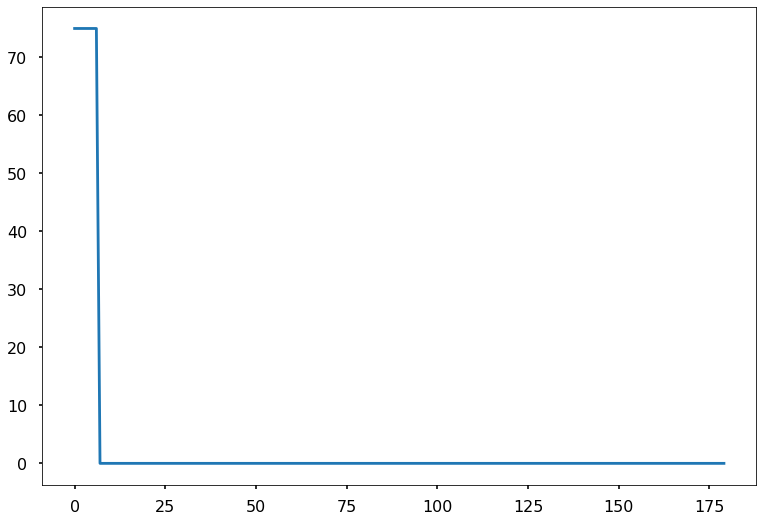

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

plane1Noys = np.zeros([mornMins, 1]) # make a minutes x 1 numpy array
plane1Noys[0:noysMinPerPlane, :] = noysLevel
plt.plot(plane1Noys)


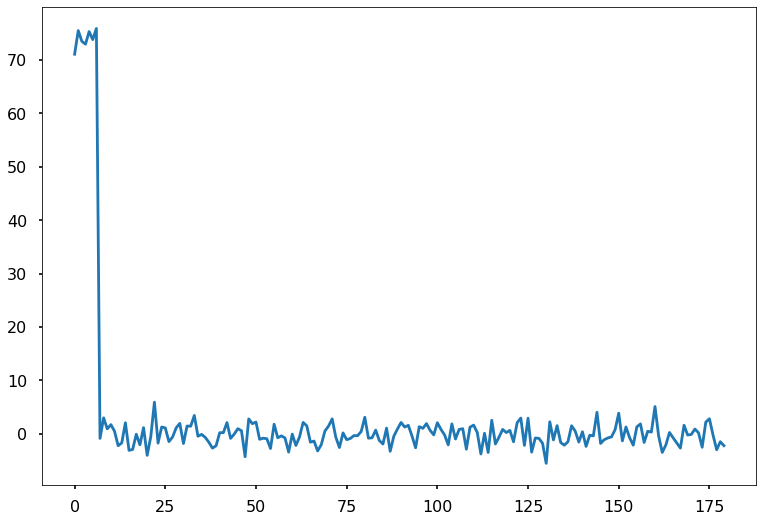

In [3]:
envNoys = noysVar*np.random.randn(mornMins, 1)  # make random environmental noise
plane1Noys = plane1Noys + envNoys               # add it to the "pure" plane noise
plt.plot(plane1Noys)

Show the noise profile of the same airplane corrupted by some small noise. 

In [4]:
arSize = plane1Noys.shape  # array size
print('arSize is', arSize, 'and is a ', type(arSize))

print(arSize)
print(*arSize)

arSize is (180, 1) and is a  <class 'tuple'>
(180, 1)
180 1


Now add a second airplane, corrupted by noise but departing/landing at a different time. Make a plot of the two airplanes together.

Text(0, 0.5, 'noise (dB)')

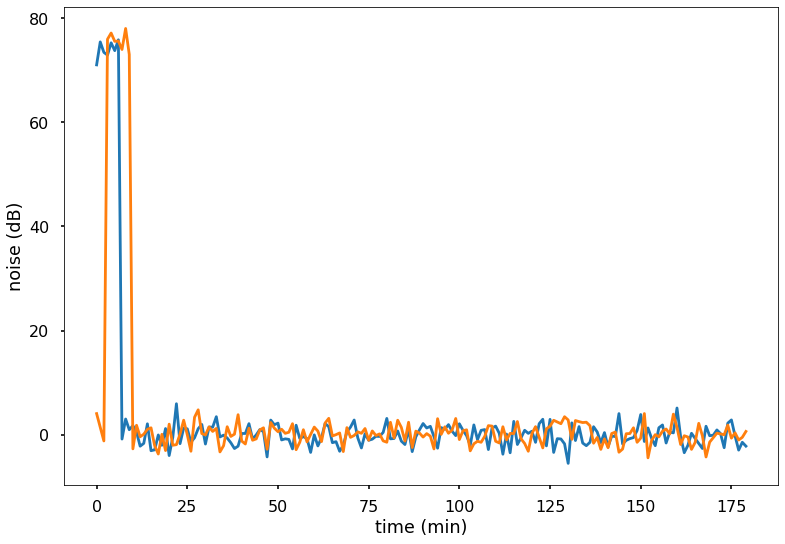

In [5]:
start = planeIntervalAM # second plane should start 3 minutes in
stop = start + noysMinPerPlane # should stop 7 minutes later

plane2Noys = np.zeros([mornMins, 1]) # make the numpy array
plane2Noys[start:stop, :] = noysLevel # make some noise

envNoys = noysVar*np.random.randn(mornMins, 1) # make the randomness of life
plane2Noys = plane2Noys + envNoys # add environment noise

planeNoys = np.hstack((plane1Noys, plane2Noys)) # make a new array by joining our planes together in a 180 x 2 array (hstack does horizontal, vstack does vertical)
plt.plot(planeNoys); # plot (use terminal semicolon so you only get the plot)
plt.xlabel('time (min)')
plt.ylabel('noise (dB)')

Finally, simulate all the the airplanes that you have estimated to land/depart in the morning. Plot them on the same figure.

Text(0, 0.5, 'noise (dB)')

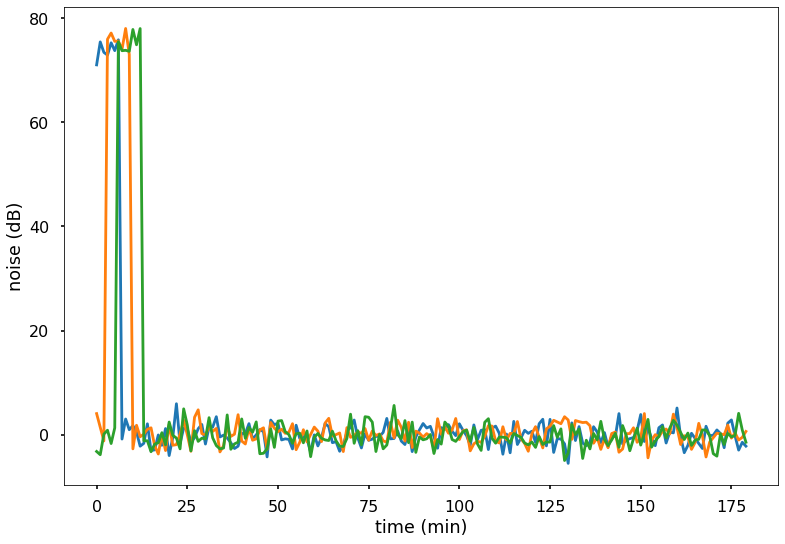

In [6]:

# Make the third plane

# figure out start and stop
planeIndex = 2 # the first plane was zero
start = planeIndex*planeIntervalAM # noise should start 6 min in for 3rd plane
stop = start + noysMinPerPlane # always stops at 7 minutes

#make the noise profile
plane3Noys = np.zeros([mornMins, 1]) # make our array
plane3Noys[start:stop, :] = noysLevel # add the plane noise
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
plane3Noys = plane3Noys + envNoys # add the enviro noise

# append it to our "all planes" array
planeNoys = np.hstack ((planeNoys, plane3Noys)) # add the new plane as a column ti big array

# and plot
plt.plot(planeNoys) # and plot (use the terminal semicolon so you get ONLY the plot)
plt.xlabel('time (min)')
plt.ylabel('noise (dB)')


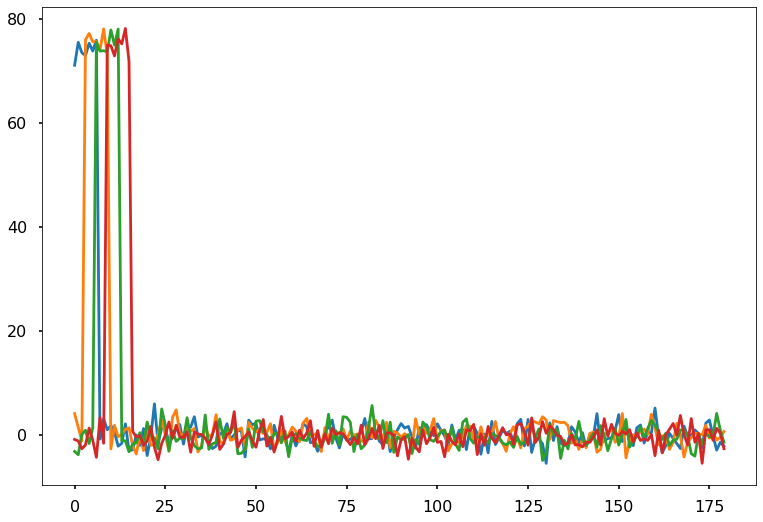

In [7]:
# make the fourth plane

planeIndex = 3 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

Next, let's start with the evening airplanes. Plot 20% of the total airplanes you estimated to depart/land in the evening. Make a plot.

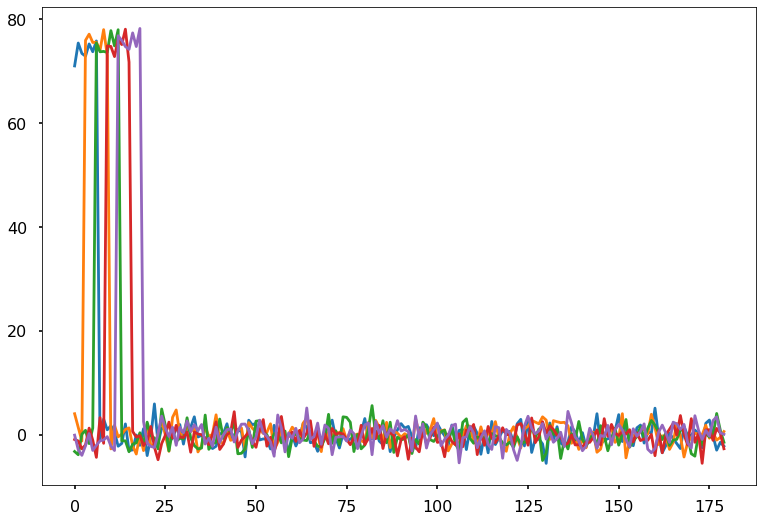

In [8]:
# make the fifth plane

planeIndex = 4 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

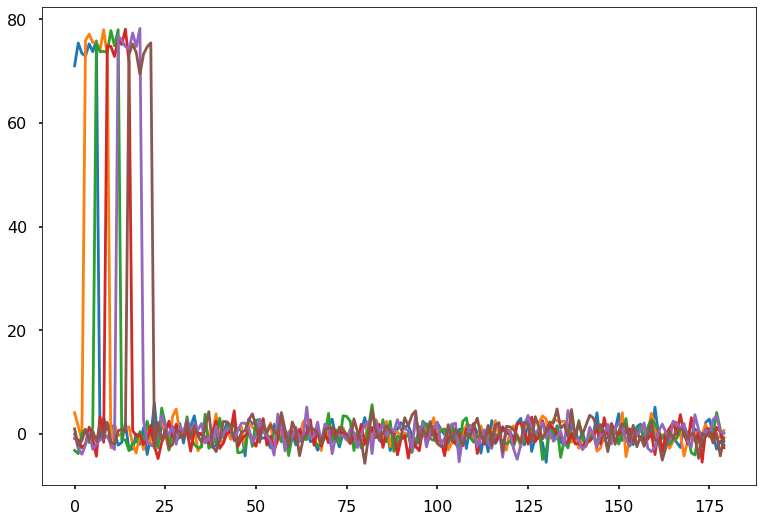

In [9]:
# make the sixth plane

planeIndex = 5 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

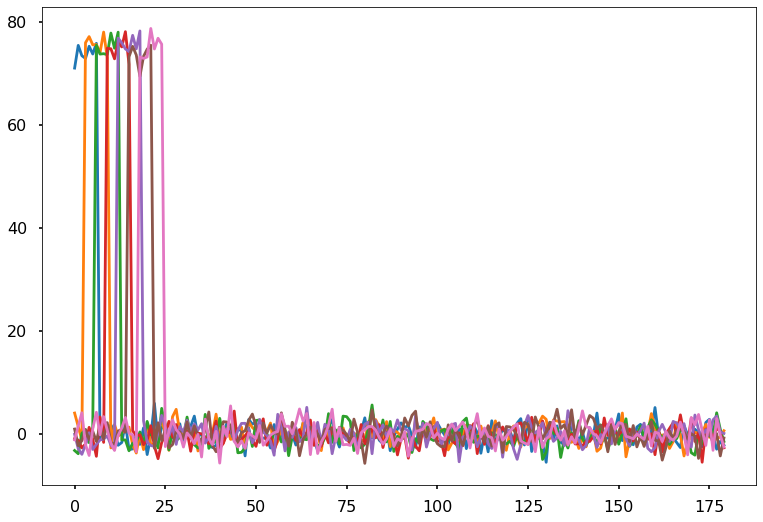

In [10]:
# make the seventh plane

planeIndex = 6 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

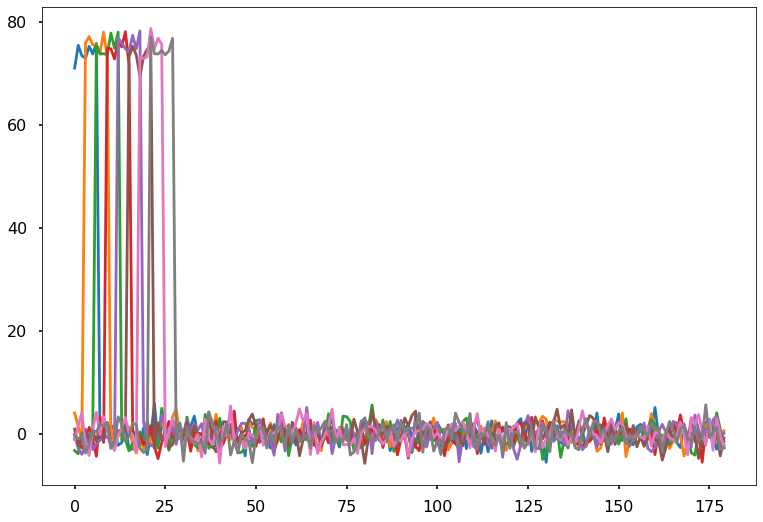

In [11]:
# make the eighth plane

planeIndex = 7 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

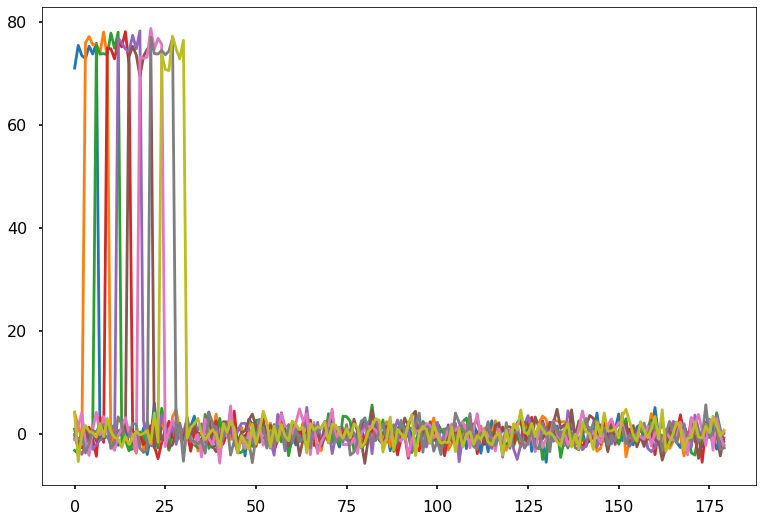

In [12]:
# make the ninth plane

planeIndex = 8 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

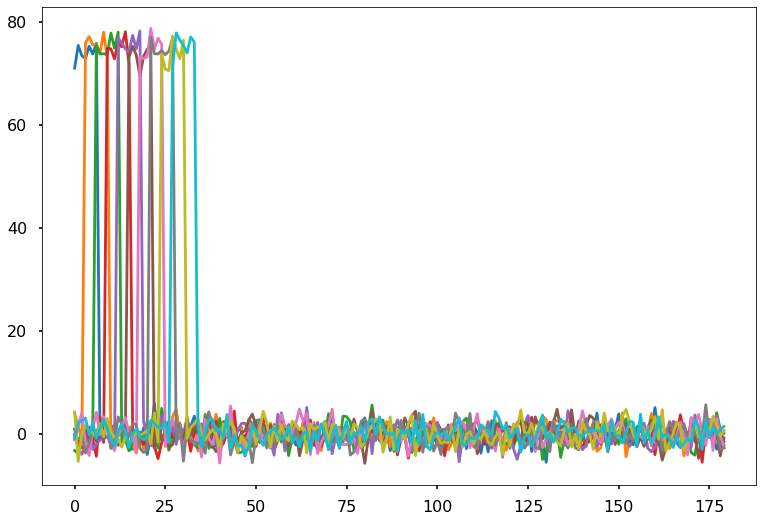

In [13]:
# make the tenth plane

planeIndex = 9 # This is the only thing we need to change now
start = planeIndex*planeIntervalAM 
stop = start + noysMinPerPlane


nextPlaneNoys = np.zeros([mornMins, 1])
nextPlaneNoys[start:stop, :] = noysLevel
envNoys = noysVar*np.random.randn(mornMins, 1) # random sounds
nextPlaneNoys = nextPlaneNoys + envNoys

#append it to "all planes" array
planeNoys = np.hstack((planeNoys, nextPlaneNoys)) # add new plane as column to big array

plt.plot(planeNoys);

Text(0, 0.5, 'noise (dB)')

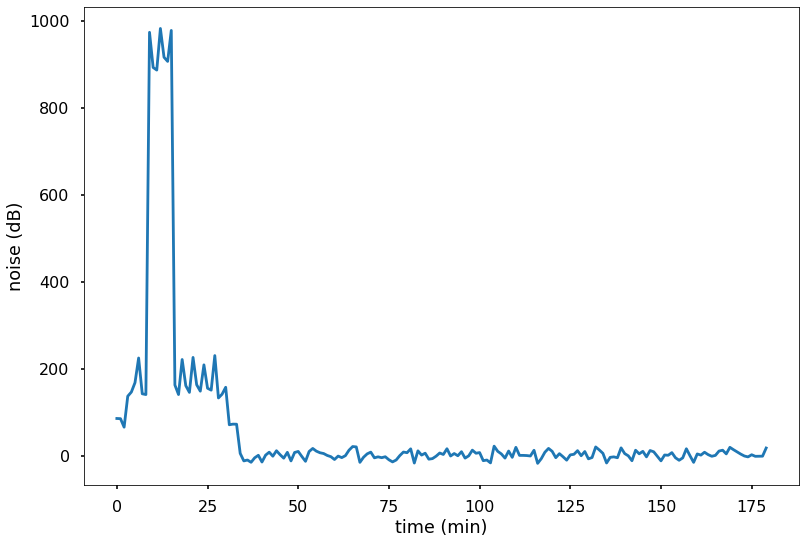

In [44]:
plt.plot(np.sum(planeNoys, 1));
plt.xlabel('time (min)')
plt.ylabel('noise (dB)')

#plt.xlim([0,25])

Plot all the evening airplanes.

(0.0, 40.0)

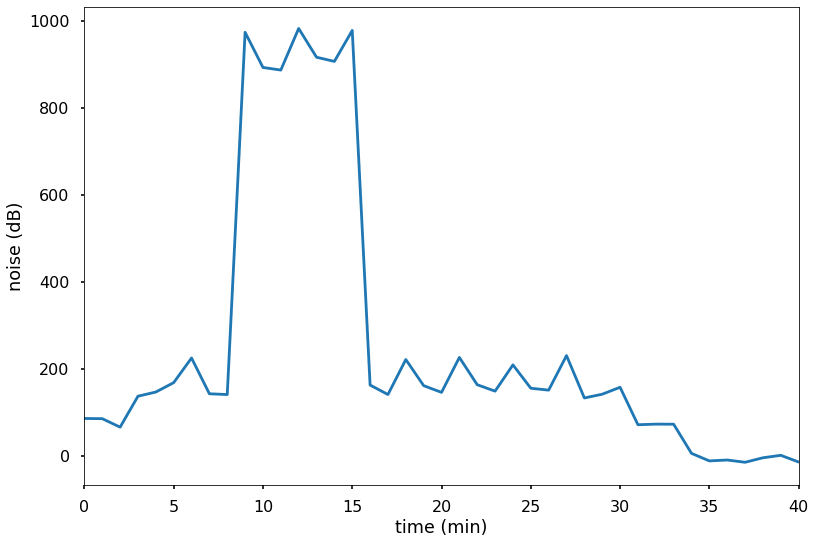

In [45]:
plt.plot(np.sum(planeNoys, 1));
plt.xlabel('time (min)')
plt.ylabel('noise (dB)')
plt.xlim([0, 40])

Combine the full day. Add the morning airplanes to the evening airplanes (hint: make a single numpy array). Plot all airplanes.

In [15]:
array = planeNoys
print(array)
array.shape

[[ 7.10305320e+01  4.04333470e+00 -3.23132892e+00 ... -3.07146250e-01
   4.25762681e+00 -8.83007607e-01]
 [ 7.54384076e+01  1.37502442e+00 -3.85439725e+00 ... -1.00073919e+00
  -5.37532278e+00  2.21336174e+00]
 [ 7.34362087e+01 -1.20886821e+00  9.87026554e-02 ... -3.70676110e-01
   1.14394574e-01  2.53170831e+00]
 ...
 [-2.96819936e+00 -1.03400999e+00  4.09077465e+00 ...  1.25942985e+00
   1.72506925e+00  1.25506745e-02]
 [-1.46674418e+00 -5.11904923e-01  8.75733962e-01 ... -3.06496852e+00
  -4.69939979e-01  8.21665492e-01]
 [-2.20598723e+00  6.13920444e-01 -1.45500398e+00 ... -2.72346884e+00
   6.82141374e-01  1.45928492e+00]]


(180, 10)

Now the simple theory Nestor is using is that the noise will add across all airplanes. So what is the average noise across the morning and evening hours that Nestor is exposed to?

Now use imshow on the full numpy array of all airplane noise. How does it look like?

Simulate the dataset of tutorial009. For this final exercise you can use tutorial009 and repurpose some of the code (for example for plotting). Also, you can use and should the dataset given to youin tutorial 090. Indeed, you will need to figure out how to generate that very same dataset (up to noise differences). Importantly, the dataset you will generate will need to keep a very similar similar Signal-to-Noise ratio of the given dataset. To do this all, try exploring the properties of the given dataset. Then implement code that generates a new dataset with similar dimensions and properties of signal and noise.

hwk: generate 10 planes of noise data in a single 180 x 10 numpy array where only one number needs to change across planes. then compute the total noise over a time